# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [405]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np

import scipy.stats

#imports downloader

%pylab inline

import os
import json

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [406]:
!ls /gws/open/Student/citibike
datestring1 = "201501"
df1 = pd.read_csv('/gws/open/Student/citibike' + "/" + datestring1 + '-citibike-tripdata.zip', compression='zip')

201307-citibike-tripdata.zip  201508-citibike-tripdata.zip
201308-citibike-tripdata.zip  201509-citibike-tripdata.zip
201309-citibike-tripdata.zip  201510-citibike-tripdata.zip
201310-citibike-tripdata.zip  201511-citibike-tripdata.zip
201311-citibike-tripdata.zip  201512-citibike-tripdata.zip
201312-citibike-tripdata.zip  201601-citibike-tripdata.zip
201401-citibike-tripdata.zip  201602-citibike-tripdata.zip
201402-citibike-tripdata.zip  201603-citibike-tripdata.zip
201403-citibike-tripdata.zip  201604-citibike-tripdata.zip
201404-citibike-tripdata.zip  201605-citibike-tripdata.zip
201405-citibike-tripdata.zip  201606-citibike-tripdata.zip
201406-citibike-tripdata.zip  201607-citibike-tripdata.zip
201407-citibike-tripdata.zip  201608-citibike-tripdata.zip
201408-citibike-tripdata.zip  201609-citibike-tripdata.zip
201409-citibike-tripdata.zip  201610-citibike-tripdata.zip
201410-citibike-tripdata.zip  201611-citibike-tripdata.zip
201411-citibike-tripdata.zip  201612-citibike-tripdata.z

In [407]:
# df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
# df1['date'] = pd.to_datetime(df1['starttime'])

In [408]:
df1.head()

tripduration      starttime       stoptime  start station id  \
0          1346  1/1/2015 0:01  1/1/2015 0:24               455   
1           363  1/1/2015 0:02  1/1/2015 0:08               434   
2           346  1/1/2015 0:04  1/1/2015 0:10               491   
3           182  1/1/2015 0:04  1/1/2015 0:07               384   
4           969  1/1/2015 0:05  1/1/2015 0:21               474   

        start station name  start station latitude  start station longitude  \
0          1 Ave & E 44 St               40.750020               -73.969053   
1          9 Ave & W 18 St               40.743174               -74.003664   
2     E 24 St & Park Ave S               40.740964               -73.986022   
3  Fulton St & Waverly Ave               40.683178               -73.965964   
4          5 Ave & E 29 St               40.745168               -73.986831   

   end station id             end station name  end station latitude  \
0             265     Stanton St & Chrystie St             40.722293   
1             482              W 15 St & 7 Ave             40.739355   
2             505              6 Ave & W 33 St             40.749013   
3             399  Lafayette Ave & St James Pl             40.688515   
4             432            E 7 St & Avenue A             40.726218   

   end station longitude  bikeid    usertype  birth year  gender  
0             -73.991475   18660  Subscriber      1960.0       2  
1             -73.999318   16085  Subscriber      1963.0       1  
2             -73.988484   20845  Subscriber      1974.0       1  
3             -73.964763   19610  Subscriber      1969.0       1  
4             -73.983799   20197  Subscriber      1977.0       1

In [409]:
datestring2 = '201507'
getCitiBikeCSV(datestring2)

file in place, you can continue


In [410]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')
# df2['date'] = pd.to_datetime(df2['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df2.head()

tripduration          starttime           stoptime  start station id  \
0           732  7/1/2015 00:00:03  7/1/2015 00:12:16               489   
1           322  7/1/2015 00:00:06  7/1/2015 00:05:29               304   
2           790  7/1/2015 00:00:17  7/1/2015 00:13:28               447   
3          1228  7/1/2015 00:00:23  7/1/2015 00:20:51               490   
4          1383  7/1/2015 00:00:44  7/1/2015 00:23:48               327   

         start station name  start station latitude  start station longitude  \
0          10 Ave & W 28 St               40.750664               -74.001768   
1     Broadway & Battery Pl               40.704633               -74.013617   
2           8 Ave & W 52 St               40.763707               -73.985162   
3           8 Ave & W 33 St               40.751551               -73.993934   
4  Vesey Pl & River Terrace               40.715338               -74.016584   

   end station id               end station name  end station latitude  \
0             368             Carmine St & 6 Ave             40.730386   
1            3002     South End Ave & Liberty St             40.711512   
2             358  Christopher St & Greenwich St             40.732916   
3             250       Lafayette St & Jersey St             40.724561   
4              72               W 52 St & 11 Ave             40.767272   

   end station longitude  bikeid    usertype  birth year  gender  
0             -74.002150   18669  Subscriber      1970.0       1  
1             -74.015756   14618  Subscriber      1984.0       1  
2             -74.007114   18801  Subscriber      1992.0       1  
3             -73.995653   19137  Subscriber      1990.0       1  
4             -73.993929   15808  Subscriber      1988.0       1

In [411]:
df_list = [df1, df2]
df = pd.concat(df_list)
dfbkup = pd.concat(df_list)
len(df)

1371228

In [412]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [413]:
#dropping some data I no longer need
df.drop(['stoptime', 'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid'], axis=1, inplace=True)

In [414]:
df.head()

tripduration      starttime  start station id    usertype  birth year  \
0          1346  1/1/2015 0:01               455  Subscriber      1960.0   
1           363  1/1/2015 0:02               434  Subscriber      1963.0   
2           346  1/1/2015 0:04               491  Subscriber      1974.0   
3           182  1/1/2015 0:04               384  Subscriber      1969.0   
4           969  1/1/2015 0:05               474  Subscriber      1977.0   

   gender  
0       2  
1       1  
2       1  
3       1  
4       1

In [415]:
df['date'] = pd.to_datetime(df['starttime'])

In [416]:
df.columns

Index(['tripduration', 'starttime', 'start station id', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# trip duration of bikers that ride during the day vs night

extracting day v night happens in the cell below

# SPLIT BY CATEGORY

In [417]:
# df is the dataframe where the content of the csv file is stored
# create a new column to store just the hour value from 'date'
df['hour'] = df['date'].dt.hour

In [418]:
def dayNnight(hour):
    if hour >= 6 and hour < 18:
        return '1'
    else:
        return '0'

In [419]:
df['knight'] = df['hour'].apply(dayNnight)
df['knight'] = df['knight'].astype(int)

In [420]:
df.head()

tripduration      starttime  start station id    usertype  birth year  \
0          1346  1/1/2015 0:01               455  Subscriber      1960.0   
1           363  1/1/2015 0:02               434  Subscriber      1963.0   
2           346  1/1/2015 0:04               491  Subscriber      1974.0   
3           182  1/1/2015 0:04               384  Subscriber      1969.0   
4           969  1/1/2015 0:05               474  Subscriber      1977.0   

   gender                date  hour  knight  
0       2 2015-01-01 00:01:00     0       0  
1       1 2015-01-01 00:02:00     0       0  
2       1 2015-01-01 00:04:00     0       0  
3       1 2015-01-01 00:04:00     0       0  
4       1 2015-01-01 00:05:00     0       0

# age of bikers for trips originating in Manhattan and in Brooklyn

**H0: there is no statistical difference in the age distribution of Manhattan and Brooklyn riders**
$$ \alpha = 0.05 $$

In [421]:
dfbkup.head()

tripduration      starttime       stoptime  start station id  \
0          1346  1/1/2015 0:01  1/1/2015 0:24               455   
1           363  1/1/2015 0:02  1/1/2015 0:08               434   
2           346  1/1/2015 0:04  1/1/2015 0:10               491   
3           182  1/1/2015 0:04  1/1/2015 0:07               384   
4           969  1/1/2015 0:05  1/1/2015 0:21               474   

        start station name  start station latitude  start station longitude  \
0          1 Ave & E 44 St               40.750020               -73.969053   
1          9 Ave & W 18 St               40.743174               -74.003664   
2     E 24 St & Park Ave S               40.740964               -73.986022   
3  Fulton St & Waverly Ave               40.683178               -73.965964   
4          5 Ave & E 29 St               40.745168               -73.986831   

   end station id             end station name  end station latitude  \
0             265     Stanton St & Chrystie St             40.722293   
1             482              W 15 St & 7 Ave             40.739355   
2             505              6 Ave & W 33 St             40.749013   
3             399  Lafayette Ave & St James Pl             40.688515   
4             432            E 7 St & Avenue A             40.726218   

   end station longitude  bikeid    usertype  birth year  gender  
0             -73.991475   18660  Subscriber      1960.0       2  
1             -73.999318   16085  Subscriber      1963.0       1  
2             -73.988484   20845  Subscriber      1974.0       1  
3             -73.964763   19610  Subscriber      1969.0       1  
4             -73.983799   20197  Subscriber      1977.0       1

In [429]:
# draw a rectangle usong lat/long to separate BK and MN trips; y = lat, x = long
# lat for MN is above 40.698215
# long for MN is left of -73.970755
# define a function that creates a new columns and assigns 1 or 0 based on long/lat

#lat = dfbkup['start station latitude']

#if (lat >= lat_min)
# df['borough] = df[[dfbkup['start station latitude'], dfbkup['start station longitude']]].apply(func, axis=1)

# define function for assigning values in column
def name_boro(lat_long):
    lat, long = lat_long
    if (lat <= 40.698215) & (long >= -73.970755):
        return 1
    else:
        return 0
    
# could do if lat <=  & lat >= or something like that to make a box

dfbkup['borough'] = dfbkup[['start station latitude', 'start station longitude']].apply(name_boro, axis=1)
dfbkup['borough'].dropna(inplace = True)
dfbkup.head()

tripduration      starttime       stoptime  start station id  \
0          1346  1/1/2015 0:01  1/1/2015 0:24               455   
1           363  1/1/2015 0:02  1/1/2015 0:08               434   
2           346  1/1/2015 0:04  1/1/2015 0:10               491   
3           182  1/1/2015 0:04  1/1/2015 0:07               384   
4           969  1/1/2015 0:05  1/1/2015 0:21               474   

        start station name  start station latitude  start station longitude  \
0          1 Ave & E 44 St               40.750020               -73.969053   
1          9 Ave & W 18 St               40.743174               -74.003664   
2     E 24 St & Park Ave S               40.740964               -73.986022   
3  Fulton St & Waverly Ave               40.683178               -73.965964   
4          5 Ave & E 29 St               40.745168               -73.986831   

   end station id             end station name  end station latitude  \
0             265     Stanton St & Chrystie St             40.722293   
1             482              W 15 St & 7 Ave             40.739355   
2             505              6 Ave & W 33 St             40.749013   
3             399  Lafayette Ave & St James Pl             40.688515   
4             432            E 7 St & Avenue A             40.726218   

   end station longitude  bikeid    usertype  birth year  gender  borough  \
0             -73.991475   18660  Subscriber      1960.0       2        0   
1             -73.999318   16085  Subscriber      1963.0       1        0   
2             -73.988484   20845  Subscriber      1974.0       1        0   
3             -73.964763   19610  Subscriber      1969.0       1        1   
4             -73.983799   20197  Subscriber      1977.0       1        0   

    Age  
0  55.0  
1  52.0  
2  41.0  
3  46.0  
4  38.0

In [430]:
# adding column for age
dfbkup["Age"]= 2015 - dfbkup['birth year']
dfbkup['Age'].dropna(inplace = True)
dfbkup.head()

tripduration      starttime       stoptime  start station id  \
0          1346  1/1/2015 0:01  1/1/2015 0:24               455   
1           363  1/1/2015 0:02  1/1/2015 0:08               434   
2           346  1/1/2015 0:04  1/1/2015 0:10               491   
3           182  1/1/2015 0:04  1/1/2015 0:07               384   
4           969  1/1/2015 0:05  1/1/2015 0:21               474   

        start station name  start station latitude  start station longitude  \
0          1 Ave & E 44 St               40.750020               -73.969053   
1          9 Ave & W 18 St               40.743174               -74.003664   
2     E 24 St & Park Ave S               40.740964               -73.986022   
3  Fulton St & Waverly Ave               40.683178               -73.965964   
4          5 Ave & E 29 St               40.745168               -73.986831   

   end station id             end station name  end station latitude  \
0             265     Stanton St & Chrystie St             40.722293   
1             482              W 15 St & 7 Ave             40.739355   
2             505              6 Ave & W 33 St             40.749013   
3             399  Lafayette Ave & St James Pl             40.688515   
4             432            E 7 St & Avenue A             40.726218   

   end station longitude  bikeid    usertype  birth year  gender  borough  \
0             -73.991475   18660  Subscriber      1960.0       2        0   
1             -73.999318   16085  Subscriber      1963.0       1        0   
2             -73.988484   20845  Subscriber      1974.0       1        0   
3             -73.964763   19610  Subscriber      1969.0       1        1   
4             -73.983799   20197  Subscriber      1977.0       1        0   

    Age  
0  55.0  
1  52.0  
2  41.0  
3  46.0  
4  38.0

In [424]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


tripduration  start station id    birth year        gender  \
count  1.371228e+06      1.371228e+06  1.185235e+06  1.371228e+06   
mean   9.024175e+02      4.573037e+02  1.976248e+03  1.059800e+00   
std    7.164578e+03      3.793511e+02  1.149466e+01  5.736944e-01   
min    6.000000e+01      7.200000e+01  1.885000e+03  0.000000e+00   
25%    3.910000e+02      3.060000e+02           NaN  1.000000e+00   
50%    6.240000e+02      4.140000e+02           NaN  1.000000e+00   
75%    1.031000e+03      4.920000e+02           NaN  1.000000e+00   
max    5.174309e+06      3.180000e+03  1.999000e+03  2.000000e+00   

               hour        knight  
count  1.371228e+06  1.371228e+06  
mean   1.402172e+01  6.764980e-01  
std    4.990542e+00  4.678126e-01  
min    0.000000e+00  0.000000e+00  
25%    1.000000e+01  0.000000e+00  
50%    1.500000e+01  1.000000e+00  
75%    1.800000e+01  1.000000e+00  
max    2.300000e+01  1.000000e+00

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

**Figure 1: histogrammed distribution of riders' ages by gender **
here is where you should have a nice caption that describes what I am looking at, why I am looking at it, and what I should notice

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

** Figure 2: the cumulative distribution of CitiBike riders' ages by gender** ... [a good caption here]

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [403]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [426]:
#ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
#print (ks)

**  FILL IN THE CELL BELOW!**

In [432]:
## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function

dfNight = df['tripduration'][(df['knight'] == 0)].values
dfDay = df['tripduration'][(df['knight'] == 1)].values

#MN = dfbkup["Age"][(dfbkup['borough'] == 1)].values
#BK = dfbkup["Age"][(dfbkup['borough'] == 0)].values

In [436]:
ks1 = scipy.stats.ks_2samp(dfNight, dfDay)
#ks2 = scipy.stats.ks_2samp(MN, BK)


print(ks1)
#print(ks2)

Ks_2sampResult(statistic=0.022754872041071739, pvalue=1.8980925973191252e-135)


In [ ]:
MN = dfbkup["Age"][(dfbkup['borough'] == 1)].values
BK = dfbkup["Age"][(dfbkup['borough'] == 0)].values

In [ ]:
ks2 = scipy.stats.ks_2samp(MN, BK)
print(ks2)

# My KS Test results (with the entire dataset)

KS Test $H_0$: The daytime and nighttime ridership samples come from the same distribution.
$$ \alpha = 0.05 $$

This K-S test investigates whether the daytime and nighttime samples are drawn from the same citibike data distribution.

The low statistic value (0.02) refers to the maximum distance between CDF of the two samples. Despite the fact that our p-value is well below our alpha value of 0.05, we cannot reject the null hypothesis that these samples come from the same distribution.

In [293]:
print(ks)

Ks_2sampResult(statistic=0.022754872041071739, pvalue=1.8980925973191252e-135)


# My KS Test (with a subset 200 times smaller)

KS Test $H_0$: The daytime and nighttime ridership samples come from the same distribution.
$$ \alpha = 0.05 $$

This K-S test investigates whether the daytime and nighttime samples are drawn from the same citibike data distribution, in this case with a subset 200 times smaller

The low statistic value (0.04) refers to the maximum distance between CDF of the two samples. Despite the fact that our p-value is well below our alpha value of 0.05, we cannot reject the null hypothesis that these samples come from the same distribution.

In [314]:
subsetNight = (len(dfNight)/200)
subsetDay = (len(dfDay)/200)

dfsubnight = df['tripduration'][(df['knight'] == 0)].sample(int(subsetNight), random_state = 5)
dfsubday = df['tripduration'][(df['knight'] == 1)].sample(int(subsetDay), random_state = 5)

ks = scipy.stats.ks_2samp(dfsubnight, dfsubday)

print(ks)

Ks_2sampResult(statistic=0.043964344670519129, pvalue=0.0058444987163359455)


The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

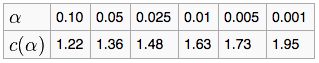

In [16]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

In [17]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS


# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

**H0: there is no statistical significant correlation between the trip duration of daytime and nighttime riders**
$$ \alpha = 0.05 $$

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [ ]:
# sorted function will work on an array

In [322]:
import scipy.stats

#pearnight = df['tripduration'](df['knight'] == 0)
#pearday = df['tripduration'](df['knight'] == 1)

pearcorr = scipy.stats.pearsonr(df['knight'], df['tripduration'])
print('Pearsons correlation coefficient: {}\np-value: {}'.format(pearcorr[0], pearcorr[1]))
# and tell me what you find in terms of NULL hypothesis

Pearsons correlation coefficient: -0.002470157893576383
p-value: 0.003821369206701247


Pearson test implies effectively no correlation for use case #1 - null hypothesis can't be rejected

In [ ]:
import scipy.stats

#pearcorr = scipy.stats.pearsonr(df['knight'], df['tripduration'])
#print('Pearsons correlation coefficient: {}\np-value: {}'.format(pearcorr[0], pearcorr[1]))
# and tell me what you find in terms of NULL hypothesis

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [282]:
spearmancorr = scipy.stats.spearmanr(df['knight'], df['tripduration'])
print('Spearmans correlation coefficient: {}\np-value: {}'.format(spearmancorr[0], spearmancorr[1]))

# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

Spearmans correlation coefficient: -0.01656791198831768
p-value: 7.387113972263166e-84


In [ ]:
#spearmancorr = scipy.stats.spearmanr(df['knight'], df['tripduration'])
#print('Spearmans correlation coefficient: {}\np-value: {}'.format(spearmancorr[0], spearmancorr[1]))

# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

~ rephrase below before sumbitting!

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed, and not necessarily zero-mean. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets.

The Spearman correlation is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets.